0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
(120+0j) (-8+40.218715937006785j) (-8+19.31370849898476j) (-8+11.972846101323912j) (-8+8j) (-8+5.345429103354389j) (-8+3.313708498984761j) (-8+1.5912989390372658j) (-8+0j) (-8-1.5912989390372658j) (-8-3.313708498984761j) (-8-5.345429103354389j) (-8-8j) (-8-11.972846101323912j) (-8-19.31370849898476j) (-8-40.218715937006785j)
120.0 41.0066471638641 20.905007438022025 14.39961957018265 11.313708498984761 9.621518190960723 8.659137602339152 8.156729265666547 8.0


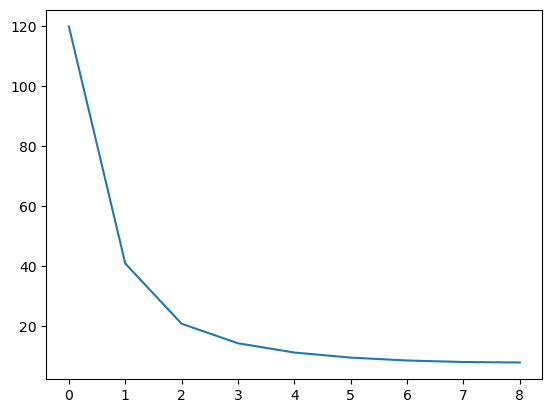

In [115]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
x = range(N)


print(*x)

goal = np.fft.fft(x)

print(*goal)
spec = abs(goal[0:int(N/2) + 1])
print(*spec)
plt.plot(spec)
plt.show()

In [116]:
w = np.zeros(N, dtype=complex)

inR = np.zeros(N)

width = int(np.log2(N))
for i in range(N):
    b = '{:0{width}b}'.format(i, width=width)
    br = int(b[::-1], 2)
    br = i
    inR[br] = x[i]    

for i in range(N):
    w[i] = np.round(np.exp(-2*1j*np.pi*(i / N)), 14)

print(*inR)
print(*w)

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0
(1+0j) (0.92387953251129-0.38268343236509j) (0.70710678118655-0.70710678118655j) (0.38268343236509-0.92387953251129j) -1j (-0.38268343236509-0.92387953251129j) (-0.70710678118655-0.70710678118655j) (-0.92387953251129-0.38268343236509j) (-1-0j) (-0.92387953251129+0.38268343236509j) (-0.70710678118655+0.70710678118655j) (-0.38268343236509+0.92387953251129j) (-0+1j) (0.38268343236509+0.92387953251129j) (0.70710678118655+0.70710678118655j) (0.92387953251129+0.38268343236509j)


In [117]:
off = 0
def gen4():
    return [f"{off}", f"{off + 1}", f"{off  +2}", f"{off + 1}"]


def gen(i):
    global off
    l = []

    if i == 4:
        l+= gen4()
        off += 4
    else:
        l+= gen(i//2)
        l+= gen(i//2)
        l[i//4] = f"{(off-i)+i//4}"
        l[3*i//4] = f"{(off-i)+i//4}"
        

    return l


from collections import namedtuple


Pair = namedtuple("Pair", ['i1','i2'])

gg = gen(N)

special = []

pairs = []

for j in range(N//2 + 1):
    if j == 0 or j == N//2:
        pairs.append(Pair(j,j))
        continue

    val1 = -1
    val2 = -1
    for i in range(len(gg)):
        if int(gg[i]) == j or N-int(gg[i]) == j:
            if i > N//2 and val1 == -1:
                special.append(N-i)
            if val1 == -1:
                val1 = i
                continue
            if val2 == -1:
                val2 = i
                break
    pairs.append(Pair(val1,val2))
# print(special)

In [118]:
def mul32con(v,st,co,dest,cnt):
    for x in range(cnt):
        v[dest + x ] = v[st + x] * co

def mul32(v,st,st2,dest,cnt):
    for x in range(cnt):
        v[dest + x ] = v[st + x] * v[st2 + x]


def add32con(v,st,co,dest,cnt):
    for x in range(cnt):
        v[dest + x ] = v[st + x] + co

def add32(v,st,st2,dest,cnt):
    for x in range(cnt):
        v[dest + x ] = v[st + x] + v[st2 + x]

# cannot be in place
def butter(v, st,dest, cnt):
    if cnt == 0:
        return
    pst = st
    if pst >= 16:
        pst = pst - 16

    print(f"butter: src: {pst} cnt: {cnt} dest: {dest}")
    if st == dest:
        print(f"uh oh src {st} == dest {dest}")
    rr = cnt//32
    if rr == 0:
        rr = 1
    c = cnt

    for i in range(rr):
        mul32con(v,st+c+32*i,-1.0,dest+c+32 * i,cnt) 
        add32(v,st +32 * i,st+c + 32 * i,dest + 32 * i,cnt)
        add32(v,st +32 * i,dest+c + 32 * i,dest + c + 32 * i,cnt)


In [136]:



v = np.copy(inR)

c = N
v.resize(N*2)


cnt = 32
cnt2 = 32

foff = 0
off = N

st = 0
while c > 1:
    st = st + 1
    c = c//2
    hc = c//2

    if c < 32:
        cnt = c

    rr = c//32
    if c//32 == 0:
        rr = 1

    if c == 1 or True:
        print(f"c: {c} cnt: {cnt}, rr: {rr}")

    # print('bruh')
    # for z in range(N):
    #     print(v[foff + z],end=', ')
    # print()

    butter(v,foff,off,c)



    # move everything that didn't get butterflied
    # if st > 1:
    #     for i in range(rr):
    #         print(f"2c {2*c}")
    #         for x in range(2*cnt):
    #             v[off + (2*c) + (32 * i) + x] = v[foff + (2*c) + (32 *i) + x]
    
    # print("ok :(")
    # for z in range(N):
    #     print(v[off + z],end=', ')
    # print()
    
    if hc < 32:
        cnt2 = hc
    
    rr = hc//32
    if hc//32 == 0:
        rr = 1

    for i in range(rr):
        mul32con(v,off + 32 * i + (c + hc),-1.0, off + 32 * i + (c+ hc), cnt2)

    # for z in range(N):
    #     print(v[off + z],end=', ')
    # print()

    # if hc == 0:
    #     hc = 1

    if c > 1:
        # print("complex")
        # IN PLACE complex
        for i in range(hc):
            print(f"{pow(2,st-1) * i} {w[pow(2,st-1) * i]}")
            res = complex(v[off +c + i],v[off+c + hc + i]) * w[pow(2,st-1) * i]
            v[off + c+i] = np.real(res)
            v[off + c+hc+i] = np.imag(res)


    # do the rest of the butterflies
    if st > 1 and c > 0:
        for xx in range(N//c - 2):
            butter(v,2*c + xx * c + foff,2*c + xx * c + off,hc)
        if c > 1:
            # pass
            for i in range(hc):
                a = off + 2*c + hc + i
                b = off+ 3*c + hc + i

                e = a + 2
                f = b

                temp = v[e]

                v[a] = temp

                print(f"cpx: {a},{b} -> {e},{f} {pow(2,st) * i} {w[pow(2,st) * i]}")
                res = complex(v[a],v[b]) * w[pow(2,st) * i]
                v[e] = np.real(res)
                v[f] = np.imag(res)

              
    if c == 1:
        v[foff] = v[off]
        v[foff +1] = v[off + 1]


    for z in range(N):
        print(v[off + z],end=', ')
    print()
    
    if off == N:
        foff = N
        off = 0
    else:
        foff = 0
        off = N

for z in range(N):
    print(v[off + z],end=', ')
print()
    




c: 8 cnt: 8, rr: 1
butter: src: 0 cnt: 8 dest: 16
0 (1+0j)
1 (0.92387953251129-0.38268343236509j)
2 (0.70710678118655-0.70710678118655j)
3 (0.38268343236509-0.92387953251129j)
8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, -8.0, -4.3295688011696, 0.0, 4.3295688011696, 8.0, 10.45250371901104, 11.3137084989848, 10.45250371901104, 
c: 4 cnt: 4, rr: 1
butter: src: 0 cnt: 4 dest: 0
0 (1+0j)
2 (0.70710678118655-0.70710678118655j)
butter: src: 8 cnt: 2 dest: 8
butter: src: 12 cnt: 2 dest: 12
cpx: 10,14 -> 12,14 0 (1+0j)
cpx: 11,15 -> 13,15 4 -1j
24.0, 28.0, 32.0, 36.0, -8.0, 0.0, 8.0, 11.3137084989848, -8.0, 0.0, 19.313708498984802, 20.90500743802208, 19.313708498984802, 0.0, -3.3137084989848002, -20.90500743802208, 
c: 2 cnt: 2, rr: 1
butter: src: 0 cnt: 2 dest: 16
0 (1+0j)
butter: src: 4 cnt: 1 dest: 20
butter: src: 6 cnt: 1 dest: 22
butter: src: 8 cnt: 1 dest: 24
butter: src: 10 cnt: 1 dest: 26
butter: src: 12 cnt: 1 dest: 28
butter: src: 14 cnt: 1 dest: 30
cpx: 21,23 -> 23,23 0 (1+0j)
56.

In [120]:

while p > 1:
    p = p//2
    c = N//(2*p)
    r = 0
    rC = c
    print(c)

    for j in range(p):
        for i in range(c):
            if i == c//2 and c != 1:
                continue
            buf = v[r + i]
            v[r + i] = v[r + i] + v[rC + i]
            v[rC + i] = buf + (-1)*v[rC + i]
        r += 2*c
        rC += 2*c
    
    

    if p == 1:
        break

    rC = 2*c

    for j in range(p//2):
        for i in range(1,2*c):
            wi = i*(p//2)         
            if N%wi == 0 and N//wi == 4:
                v[rC + i] = (-1)*v[rC + i]
            elif wi not in special: 
                tr = np.real(w[wi])
                ti = np.imag(w[wi])

                if wi > maxWi:
                    maxWi = wi

                pairI = 0
                if (rC+i) < N//2:
                    pairI = (rC+i)
                else:
                    pairI = N-(rC+i)

                dis = pairs[pairI].i2 - pairs[pairI].i1 
                       
                buf = v[rC + i]
                v[rC + i] = v[rC + i]*tr + (-1)*(v[rC + i + dis]*ti)
                v[rC + i + dis] = buf*ti + v[rC + i + dis]*tr
        rC += 4*c

calcSpec = []

for pair in pairs:
    if pair.i1 == pair.i2:
        calcSpec.append(v[pair.i1] * v[pair.i1])
    else:
        calcSpec.append(v[pair.i1] * v[pair.i1] + v[pair.i2] * v[pair.i2])

calcSpec = np.sqrt(calcSpec)

print(maxWi)

print(*calcSpec)
plt.plot(calcSpec)
plt.show()

NameError: name 'p' is not defined